# Comparing variable and fixed interest rates

Comparing variable and fixed interest rate mortgages is hard.  While there are some obvious points of comparison (typically lower rates for variable at any given point, and higher rates for fixed; early termination fees are smaller for variable than fixed, etc.) it's difficult to get any accurate comparisons of where your money is going and what is a better investment.

The metric I care about is for a fixed monthly payment, how much is going into principal and how much is going into interest? This is suprisingly difficult to answer online-- I didn't find any good calculators for this, because no one want to provide a tool for specifying future interest rates. Things get even more complicated to make comparisons with, because fixed and variable rate mortgages compound interest differently (semi-annually vs monthly). So what we should do is make a comparison list of several possible interest rate trajectories, and see what the outcomes are.

A few observations about what we want to learn: 

* Variable rates tend to be lower, and therefore start with a lower monthly payment. We're going to raise our montly payment here with extra pyaments towards principal to equalize the payments. 
* When interest rates go up for variable rate loans, the monthly payment stays the same, and less money goes towards principal. This is where the interesting comparison lies: we'll typically be paying the same amount no matter what, but want to see how much of this is going towards our equity (principal) vs the bank.
* At least one of our lending options for the variable requires a 30 year term, which again lowers the monthly payment. We'll make up for the difference using extra payments towards principal, and see how this ends up comparing.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# basic imports
import calc_tools as ct
import numpy as np

## Some basic comparisons

Paying down 520746 in balance, on a 30 year loan, so 25 years left.

In [25]:
balance = 520746
fixed_rate = 5.13
amort = 25

In [27]:
monthly_fixed = ct.calculate_payment(balance, fixed_rate, amort)
print(monthly_fixed)

3067.34


Compare to variable rate payments, which has a much higher interest rate-- also 25 year amortization period remaining.

In [28]:
monthly_variable = ct.calculate_payment(balance, 6.35, amort, variable = True)
print(monthly_variable)

3467.46


Extra payments per month should be the difference here:

In [5]:
extra = ct.generate_flat(monthly_variable - monthly_fixed, months = 36)
print(extra[0])

400.1199999999999


Let's calculate a few scenarios out now:

1) Fixed rate 
2) Fixed rate, with extra payments
3) Variable rate

In [6]:
variable_base = ct.generate_flat(6.35)
fixed = ct.generate_flat(5.13)

The function that does the magic here is ```calculate_montly_amortization(loan, rates, loan_length_years, term_length_years, extra_payments = [], variable = False)```. 

In [29]:
output_fixed = ct.calculate_monthly_amortization(balance, fixed, amort, 3, variable = False)
output_fixed_extra = ct.calculate_monthly_amortization(balance, fixed, amort, 3, extra_payments = extra)
output_variable = ct.calculate_monthly_amortization(balance, variable_base, amort, 5, variable = True)

Magic! The hard part is done. Let's do some comparisons now. 

First do a quick slimming down to 36 months for the variable for plotting.

In [30]:
output_variable_reduced = {}
for key in output_variable:
    output_variable_reduced[key] = output_variable[key][:36]

In [31]:
basic_comparison = [output_fixed, output_fixed_extra, output_variable_reduced]
basic_labels = ['Fixed 5.13', 'Fixed 5.13 with Extra', 'Variable 6.35']

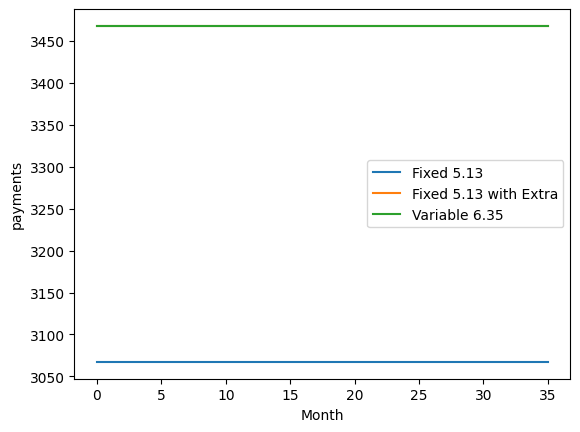

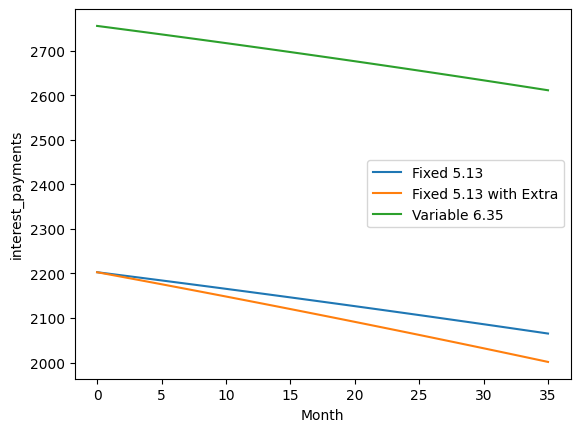

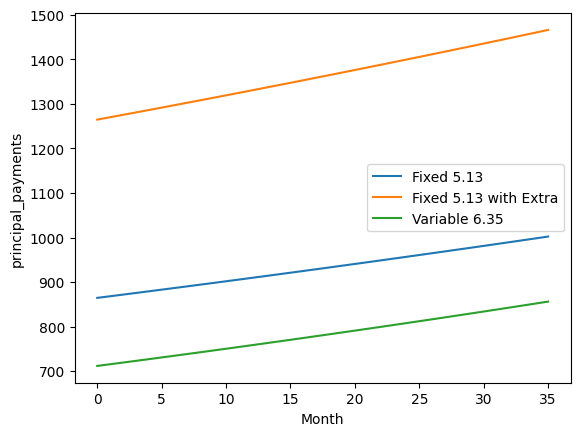

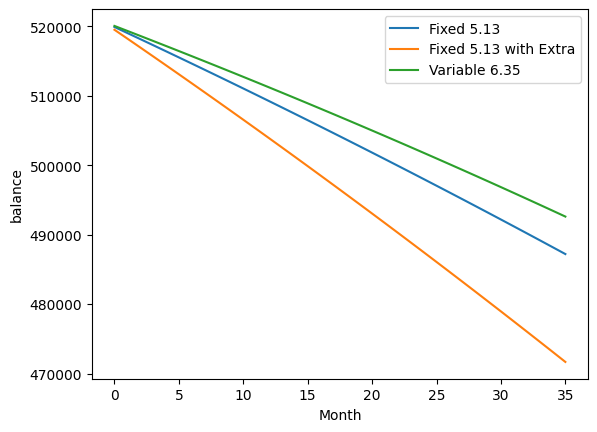

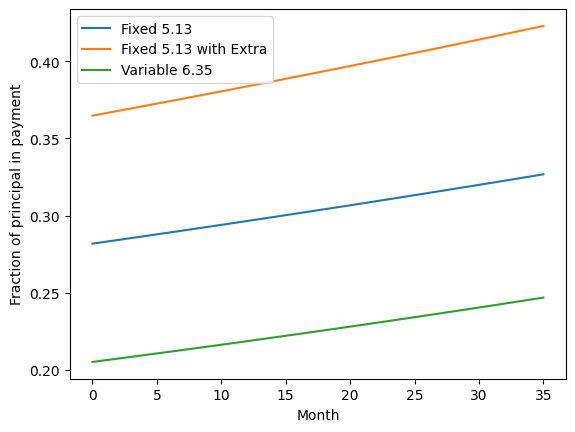

In [32]:
ct.make_plots_vs_time(basic_comparison, basic_labels)

For Fixed 5.13, your final balance is 487202.8. You paid 76881.04 in interest and 33543.2 in principal, for a principal fraction of 0.304

For Fixed 5.13 with Extra, your final balance is 471679.27. You paid 75761.83 in interest and 49066.73 in principal, for a principal fraction of 0.393

For Variable 6.35, your final balance is 492597.66. You paid 96680.22 in interest and 28148.34 in principal, for a principal fraction of 0.225

Out of the above choices, Fixed 5.13 with Extra has the best final balance, at 471679.27. This gives 20918.39 of savings compared to the worst scenario, Variable 6.35.


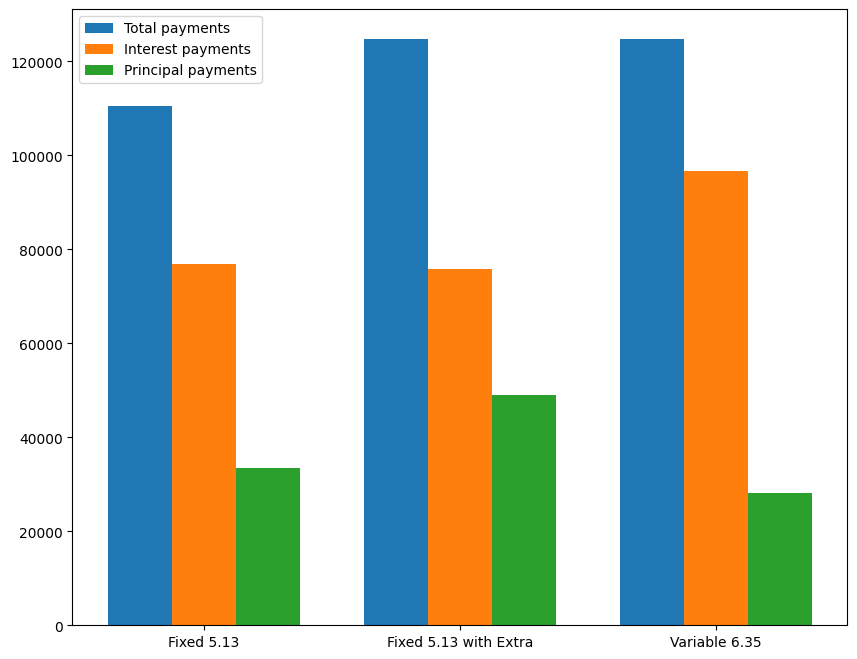

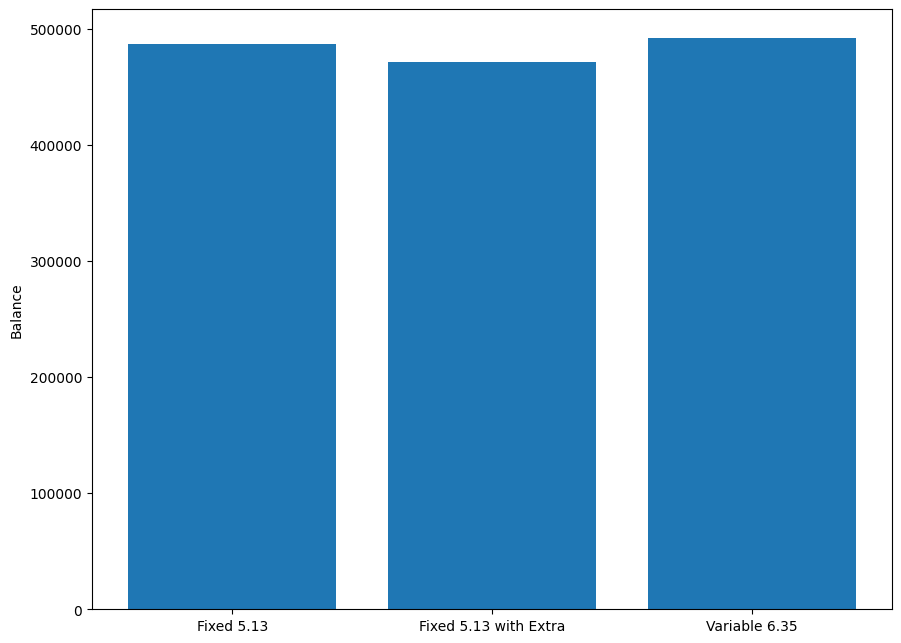

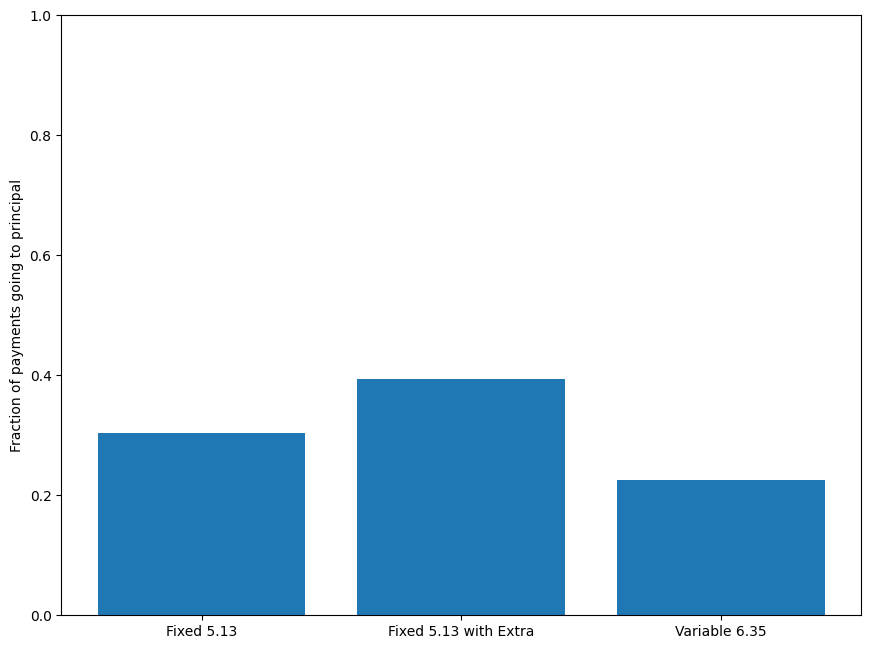

In [33]:
ct.make_summary(basic_comparison, basic_labels)

## More complicated scenarios

Ok, so from the above it looks like you're getting 40k for free from the variable rate approach. But we know that's not true-- the big complication is that rates might go up! And we don't know how much! So let's construct a few interest rate scenarios, and compare them to the baseline.

The first important piece of input here is that we know the US Fed has announced 6 interest rate hikes over the next year-- every two months. Canada will probably do something similar, as interest rates always seem to be pretty correlated between the two countries. We can construct a few possible scenarios from this:

1) Variable 1.74 medium: we get the scheduled rate hikes, and they hold for all five years.
2) Variable 1.74 very optimistic: we get the schedule rate hikes, hold for a year, then lower again.
3) Variable 1.74 optimistic: we get the schedule rate hikes, they hold for two years, then lower again.
4) Variable 1.74 very pessimistic: we get the scheduled rate hikes, keep going at the same rate for a year, and hold
5) Variable 1.74 pessimistic: we get the scheduled rates hikes, keep going at the same rate for a year, hold for a year, start reducing at same rate

So let's construct these options. We already have a 1.74 variable base, so we just have to create modifications to that and sum them in.

In [34]:
perch = [5.66, 6.09, 5.62, 5.2, 4.75, 4.31, 4.27, 3.96, 4.15, 3.95] + np.ones(10) * 0.69
perch_rates = np.concatenate([ct.generate_flat(perch_rate, 6) for perch_rate in perch])
print(perch)
print(perch_rates)
# 2023-06-30	5.66%
# 2023-12-31	6.09%
# 2024-06-30	5.62%
# 2024-12-31	5.20%
# 2025-06-30	4.75%
# 2025-12-31	4.31%
# 2026-06-30	4.27%
# 2026-12-31	3.96%
# 2027-06-30	4.15%
# 2027-12-31	3.95%
# 2028-06-30	4.28%
# 2028-12-31	4.19%

[6.35 6.78 6.31 5.89 5.44 5.   4.96 4.65 4.84 4.64]
[6.35 6.35 6.35 6.35 6.35 6.35 6.78 6.78 6.78 6.78 6.78 6.78 6.31 6.31
 6.31 6.31 6.31 6.31 5.89 5.89 5.89 5.89 5.89 5.89 5.44 5.44 5.44 5.44
 5.44 5.44 5.   5.   5.   5.   5.   5.   4.96 4.96 4.96 4.96 4.96 4.96
 4.65 4.65 4.65 4.65 4.65 4.65 4.84 4.84 4.84 4.84 4.84 4.84 4.64 4.64
 4.64 4.64 4.64 4.64]


Let's plot these to make sure they look sensible

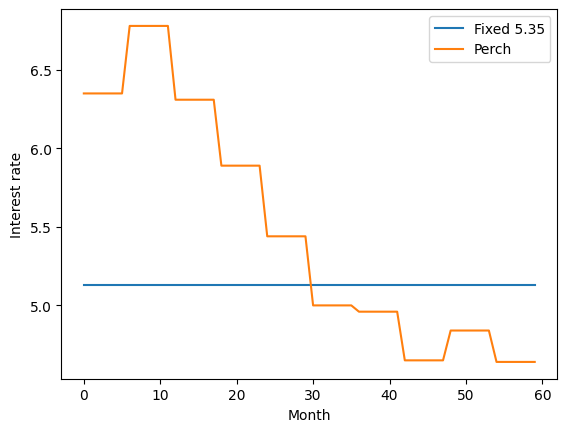

In [24]:
ct.plot_vs_time([fixed, perch_rates], ['Fixed 5.13', 'Perch'], ylabel='Interest rate')

Ok, all set. So let's do some comparisons calculations. 

In [38]:
output_perch = ct.calculate_monthly_amortization(balance, perch_rates, 25, 5, variable = True)
output_perch_reduced = ct.reduce_output(output_perch, 36)

In [39]:
advanced_comparison = [output_fixed, output_fixed_extra, output_perch_reduced]
advanced_labels = ['Fixed 5.13', 'Fixed 5.13 w/ Extra', 'Perch']

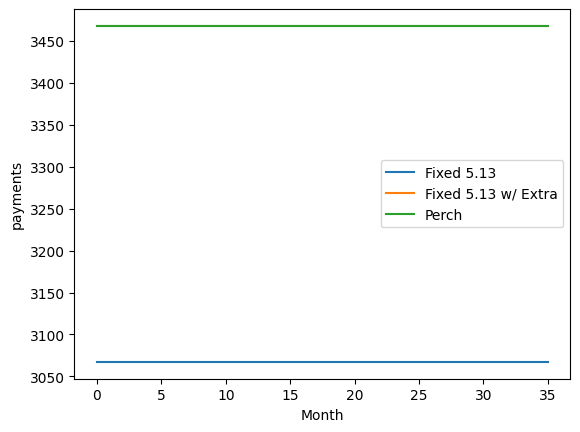

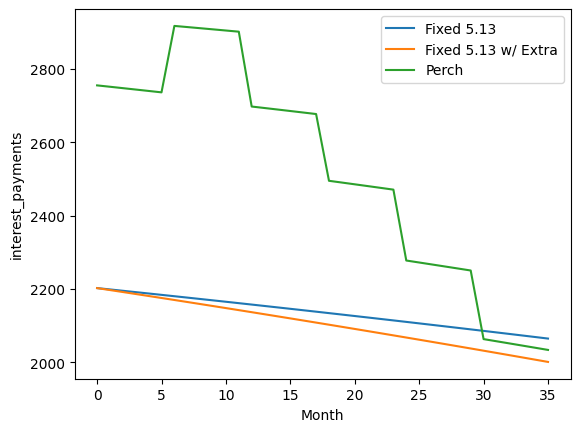

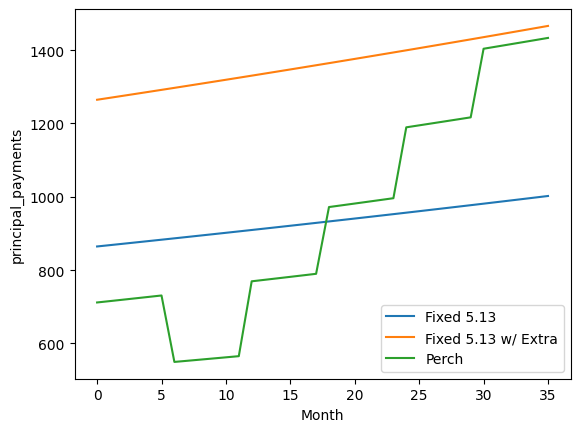

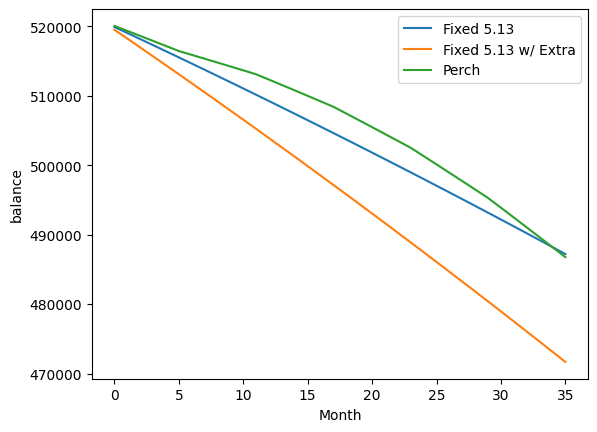

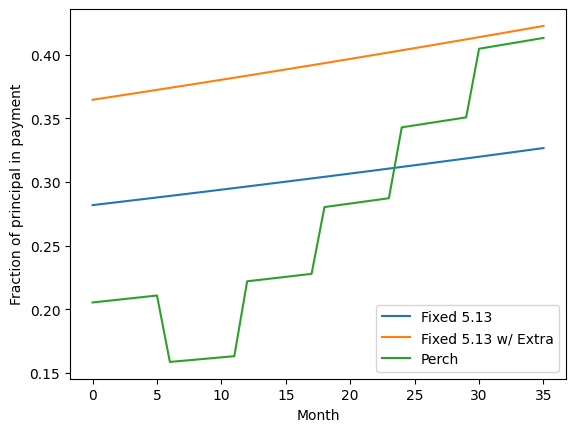

For Fixed 5.13, your final balance is 487202.8. You paid 76881.04 in interest and 33543.2 in principal, for a principal fraction of 0.304

For Fixed 5.13 w/ Extra, your final balance is 471679.27. You paid 75761.83 in interest and 49066.73 in principal, for a principal fraction of 0.393

For Perch, your final balance is 486760.23. You paid 90842.79 in interest and 33985.77 in principal, for a principal fraction of 0.272

Out of the above choices, Fixed 5.13 w/ Extra has the best final balance, at 471679.27. This gives 15523.53 of savings compared to the worst scenario, Fixed 5.13.


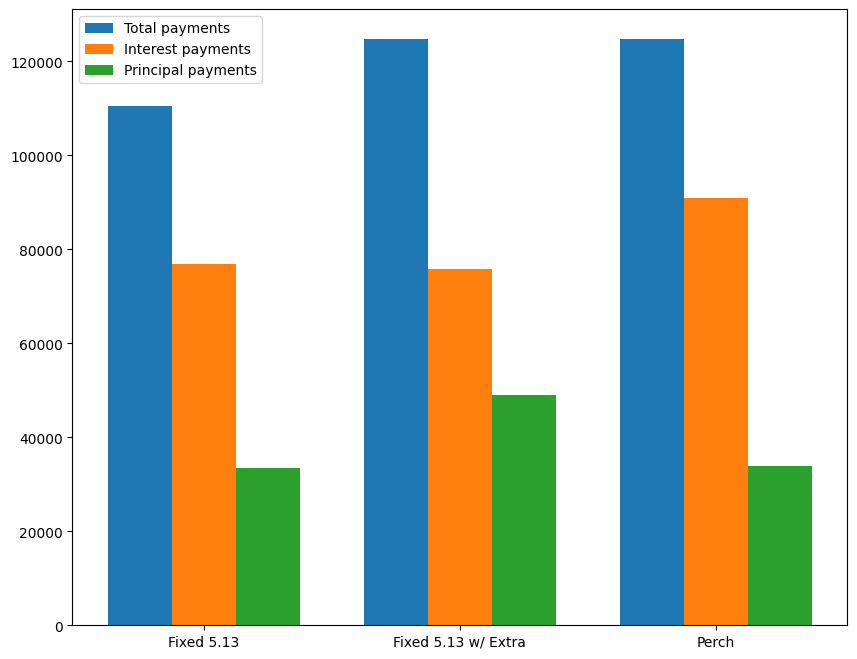

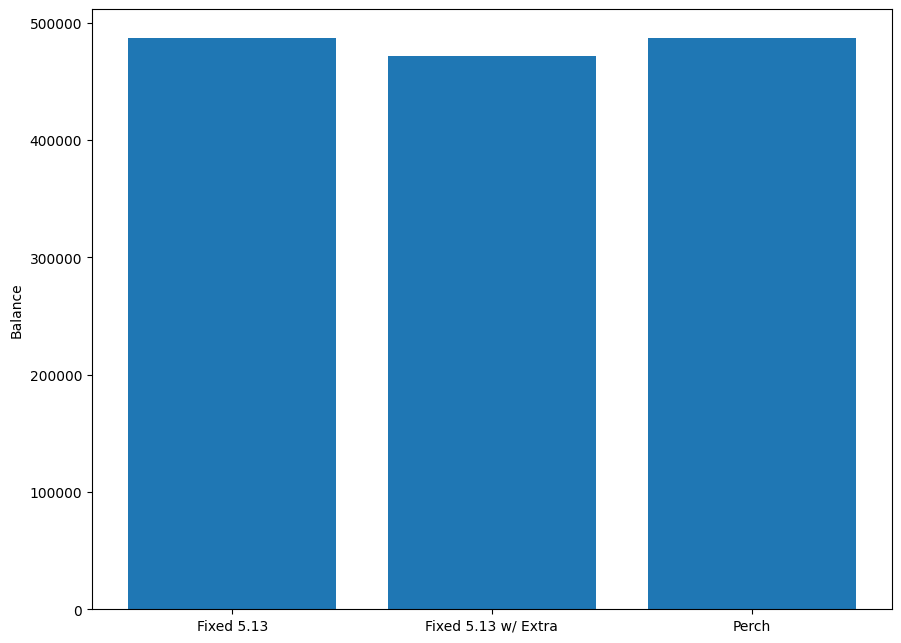

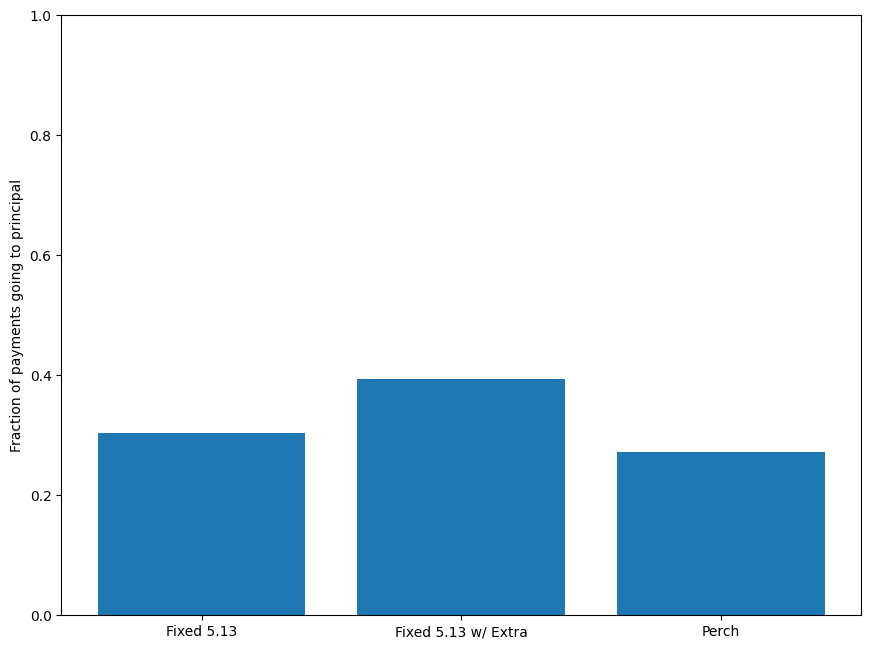

In [40]:
ct.make_plots_vs_time(advanced_comparison, advanced_labels)
ct.make_summary(advanced_comparison, advanced_labels)